In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv("/content/drive/MyDrive/ML/Class5/House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [21]:
df["Area Locality"].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [8]:
area_type = {
    'Super Area': 0, 
    'Carpet Area': 1, 
    'Built Area': 2
}

In [9]:
df['Area Type'] = df['Area Type'].apply(lambda x: area_type[x])

In [10]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,0,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,0,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,0,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,0,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,1,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


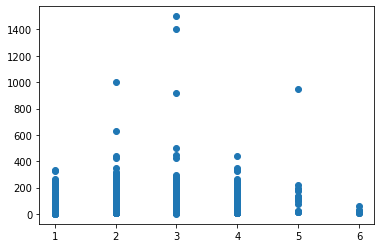

In [23]:
x = df["BHK"] 
y = df["Rent"] / df["Size"]


plt.scatter(x, y)
plt.show()

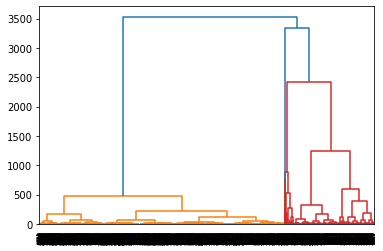

In [24]:
data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

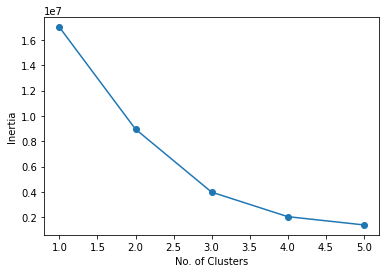

In [27]:
inertia = []
for i in range (1, 6):
  kmeans =KMeans(n_clusters = i )
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia, marker = 'o')
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.show()

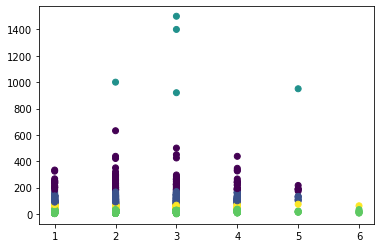

In [29]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

In [31]:
def word_int(word):
  sum=0
  for i in word:
    sum+=ord(i)
  return sum

In [32]:
df["Area Locality"]=df["Area Locality"].apply(lambda el:word_int(el))

In [33]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,0,582,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,0,2223,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,0,1996,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,0,1050,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,1,1183,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [35]:
x1=df["BHK"]+df["Bathroom"]
y1=df["Area Locality"]

In [36]:
X = list(zip(x1, y1))

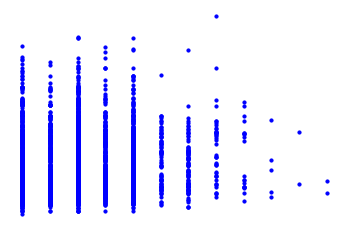

In [37]:
plt.scatter(x1,y1, s = 10, c = 'b')
plt.axis('off')
plt.show()

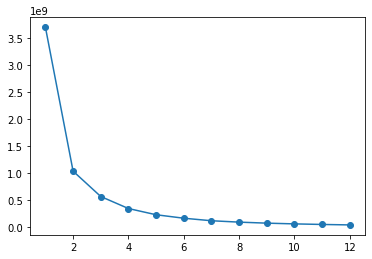

In [38]:
inertias=[]
for i in range(1,13):
  Kmean = KMeans(n_clusters=i)
  Kmean.fit(X)
  inertias.append(Kmean.inertia_)
plt.plot(range(1,13),inertias,marker='o')
plt.show()

In [39]:
arr=Kmean.cluster_centers_
print(arr)

[[3.88165680e+00 1.30126923e+03]
 [4.34491979e+00 2.73275401e+03]
 [4.26579521e+00 1.98544009e+03]
 [3.91025641e+00 4.25066667e+03]
 [3.85260483e+00 8.31279543e+02]
 [4.27937337e+00 2.38839948e+03]
 [4.07254902e+00 1.58332157e+03]
 [4.04464286e+00 3.63524107e+03]
 [4.27272727e+00 5.19254545e+03]
 [3.79032258e+00 5.34806452e+02]
 [4.02831257e+00 1.06854813e+03]
 [4.28037383e+00 3.15490187e+03]]


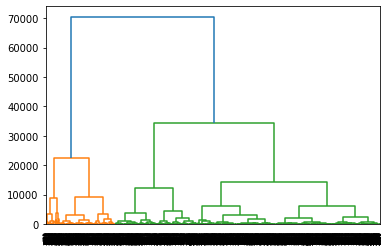

In [43]:
linkage_data = linkage(X, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

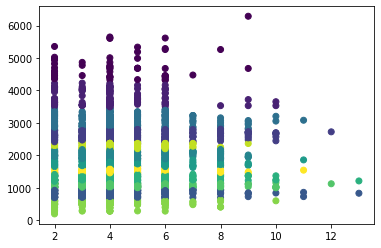

In [44]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(X)

plt.scatter(x1, y1, c=labels)
plt.show()